<a href="https://colab.research.google.com/github/asegura4488/CienciaDatos/blob/main/Semana4/QuejasAmbientales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
from google.colab import files
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.chdir('/content/drive/MyDrive/ColabNotebooks/Cursos/CursoCienciaDatos/Semana4')
!ls

Datos  EstimadoresEstadísticos.ipynb  QuejasAmbientales.ipynb


In [3]:
data = pd.read_csv('Datos/QuejasAmbientales.csv')
data

,REGIONAL,MEDIO DE RECEPCION,TIPO DE AFECTACION,RECURSO AFECTADO,MUNICIPIO,Periodo
0,Bosques,Telefónico,TALA BOSQUE NATURAL NATIVO,FLORA,SAN LUIS,2021
1,Aguas,Pagina Web,CONFLICTOS POR USO DEL AGUA,AGUA,SAN RAFAEL,2021
2,Bosques,Pagina Web,TALA BOSQUE NATURAL NATIVO,FLORA,SAN LUIS,2021
3,Bosques,Telefónico,CONTAMINACION DEL AGUA,AGUA,PUERTO TRIUNFO,2021
4,Paramo,Pagina Web,CONTAMINACIÓN POR VERTIMIENTOS,SUELO,SONSÓN,2021
...,...,...,...,...,...,...
1800,Valles,Correo electrónico,CONTAMINACIÓN POR VERTIMIENTOS,AGUA,GUARNE,2021
1801,Valles,Correo electrónico,TALA BOSQUE NATURAL NATIVO,FLORA,GUARNE,2021
1802,Valles,Correo electrónico,MOVIMIENTO DE TIERRAS,AGUA,LA CEJA,2021
1803,Aguas,Correo electrónico,MOVIMIENTO DE TIERRAS,AGUA,GUATAPÉ,2021


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1805 entries, 0 to 1804
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   REGIONAL             1805 non-null   object
 1   MEDIO DE  RECEPCION  1805 non-null   object
 2   TIPO DE AFECTACION   1805 non-null   object
 3   RECURSO AFECTADO     1805 non-null   object
 4   MUNICIPIO            1805 non-null   object
 5   Periodo              1805 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 84.7+ KB


In [8]:
data.isna().sum().sum()

np.int64(0)

In [9]:
Features = data.keys()
Features

Index(['REGIONAL', 'MEDIO DE  RECEPCION', 'TIPO DE AFECTACION',
       'RECURSO AFECTADO', 'MUNICIPIO', 'Periodo'],
      dtype='object')

In [10]:
for col in Features:
  print(col, data[col].unique())

REGIONAL ['Bosques' 'Aguas' 'Paramo' 'Porce' 'Valles' 'AGUAS' 'PORCE' 'VALLES']
MEDIO DE  RECEPCION ['Telefónico' 'Pagina Web' 'Correo electrónico' 'Personal' 'Escrita'
 'De oficio']
TIPO DE AFECTACION ['TALA BOSQUE NATURAL NATIVO' 'CONFLICTOS POR USO DEL AGUA'
 'CONTAMINACION DEL AGUA' 'CONTAMINACIÓN POR VERTIMIENTOS'
 'MOVIMIENTO DE TIERRAS' 'OLORES' 'MINERIA' 'INTERVENCIÓN  DE CAUCE'
 'RETIRO A FUENTES HÍDRICAS' 'USO ILEGAL DEL AGUA' 'TALA O PODA ARBOLES'
 'QUEMAS' 'DESCORTEZADO DE ÁRBOLES' 'MANEJO RESIDUOS SÓLIDOS ORDINARIOS'
 'EMISIÓN DE PARTICULAS' 'EMISION ATMOSFÉRICA' 'RUIDO']
RECURSO AFECTADO ['FLORA' 'AGUA' 'SUELO' 'AIRE']
MUNICIPIO ['SAN LUIS' 'SAN RAFAEL' 'PUERTO TRIUNFO' 'SONSÓN' 'ALEJANDRÍA'
 'SANTO DOMINGO' 'SAN ROQUE' 'GUARNE' 'LA CEJA' 'LA UNIÓN' 'CONCEPCIÓN'
 'RIONEGRO' 'SAN VICENTE' 'EL PEÑOL' 'EL CARMEN' 'EL RETIRO' 'ABEJORRAL'
 'COCORNÁ' 'GUATAPÉ' 'SAN FRANCISCO' 'SAN CARLOS' 'MARINILLA'
 'EL SANTUARIO' 'NARIÑO' 'GRANADA' 'ARGELIA']
Periodo [2021]


In [11]:
data.describe()

,Periodo
count,1805.0
mean,2021.0
std,0.0
min,2021.0
25%,2021.0
50%,2021.0
75%,2021.0
max,2021.0


In [13]:
# Vamos a ubicarnos en cierto tipos de afectación
mask1 = data['TIPO DE AFECTACION'] == 'TALA BOSQUE NATURAL NATIVO'
mask2 = data['TIPO DE AFECTACION'] == 'MOVIMIENTO DE TIERRAS'
mask3 = data['TIPO DE AFECTACION'] == 'CONTAMINACIÓN POR VERTIMIENTOS'

In [21]:
# Aplicamos mascara
data = data[mask1 | mask2 | mask3]

In [22]:
N = data.shape[0]
N

1154

In [23]:
# Las variables son categoricas, cómo hacemos el conteo
Conteos_Municipio = pd.value_counts(data['MUNICIPIO'])
#Conteos_Municipio

/tmp/ipython-input-4084313953.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  Conteos_Municipio = pd.value_counts(data['MUNICIPIO'])


In [24]:
Probabilidad = Conteos_Municipio/N
Probabilidad

,count
MUNICIPIO,
RIONEGRO,0.157712
GUARNE,0.151646
SAN CARLOS,0.060659
SAN LUIS,0.052860
SAN VICENTE,0.050260
MARINILLA,0.042461
ABEJORRAL,0.040728
EL RETIRO,0.037262
SONSÓN,0.037262


In [27]:
Counts_Tipo = pd.value_counts( data['TIPO DE AFECTACION'] ).sort_values( ascending=False )
Counts_Tipo

/tmp/ipython-input-411963830.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  Counts_Tipo = pd.value_counts( data['TIPO DE AFECTACION'] ).sort_values( ascending=False )


,count
TIPO DE AFECTACION,
TALA BOSQUE NATURAL NATIVO,644
MOVIMIENTO DE TIERRAS,273
CONTAMINACIÓN POR VERTIMIENTOS,237


In [32]:
# Tablas de contingencia (La relación entre al menos dos variables)
CrossAfectacion = pd.crosstab( data['MUNICIPIO'], data['TIPO DE AFECTACION']  ).sort_values( by='MOVIMIENTO DE TIERRAS', ascending=False )
CrossAfectacion

TIPO DE AFECTACION,CONTAMINACIÓN POR VERTIMIENTOS,MOVIMIENTO DE TIERRAS,TALA BOSQUE NATURAL NATIVO
MUNICIPIO,,,
GUARNE,41,43,91
RIONEGRO,68,35,79
SAN VICENTE,3,25,30
EL CARMEN,8,16,19
LA CEJA,9,14,20
SANTO DOMINGO,7,14,21
EL RETIRO,7,13,23
ABEJORRAL,7,13,27
EL SANTUARIO,5,12,15


<Axes: xlabel='TIPO DE AFECTACION', ylabel='MUNICIPIO'>

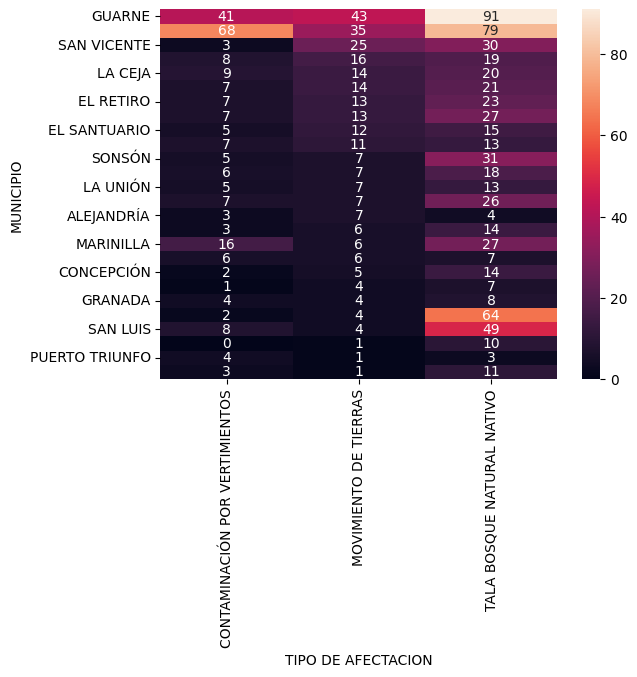

In [36]:
sns.heatmap( CrossAfectacion, annot=True )

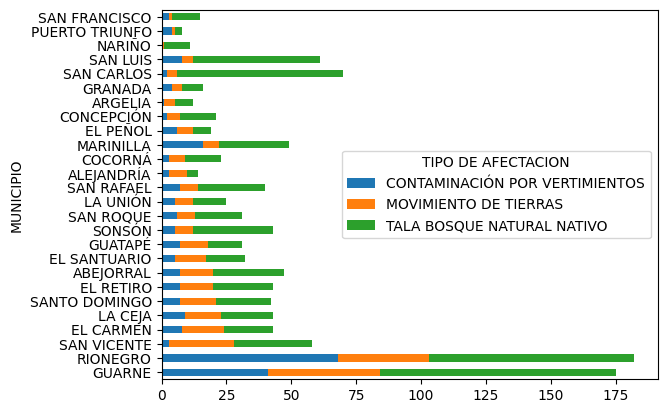

In [41]:
ax = CrossAfectacion.plot( kind= 'barh', stacked=True )

In [43]:
#Pregunta: Promedio de reporte de tala de bosque natural nativo?

In [44]:
TalaBosques = CrossAfectacion['TALA BOSQUE NATURAL NATIVO']
TalaBosques

,TALA BOSQUE NATURAL NATIVO
MUNICIPIO,
GUARNE,91
RIONEGRO,79
SAN VICENTE,30
EL CARMEN,19
LA CEJA,20
SANTO DOMINGO,21
EL RETIRO,23
ABEJORRAL,27
EL SANTUARIO,15


In [49]:
ValorMedio = 0.
for municipio in TalaBosques.keys():
  print(municipio,Probabilidad[municipio],TalaBosques[municipio])
  ValorMedio += Probabilidad[municipio]*TalaBosques[municipio]
ValorMedio

GUARNE 0.15164644714038128 91
RIONEGRO 0.15771230502599654 79
SAN VICENTE 0.05025996533795494 30
EL CARMEN 0.03726169844020797 19
LA CEJA 0.03726169844020797 20
SANTO DOMINGO 0.036395147313691506 21
EL RETIRO 0.03726169844020797 23
ABEJORRAL 0.04072790294627383 27
EL SANTUARIO 0.02772963604852686 15
GUATAPÉ 0.026863084922010397 13
SONSÓN 0.03726169844020797 31
SAN ROQUE 0.026863084922010397 18
LA UNIÓN 0.021663778162911613 13
SAN RAFAEL 0.03466204506065858 26
ALEJANDRÍA 0.012131715771230503 4
COCORNÁ 0.01993067590987868 14
MARINILLA 0.04246100519930676 27
EL PEÑOL 0.016464471403812825 7
CONCEPCIÓN 0.018197573656845753 14
ARGELIA 0.010398613518197574 7
GRANADA 0.01386481802426343 8
SAN CARLOS 0.060658578856152515 64
SAN LUIS 0.05285961871750433 49
NARIÑO 0.009532062391681109 10
PUERTO TRIUNFO 0.006932409012131715 3
SAN FRANCISCO 0.012998266897746967 11


np.float64(44.286828422876944)

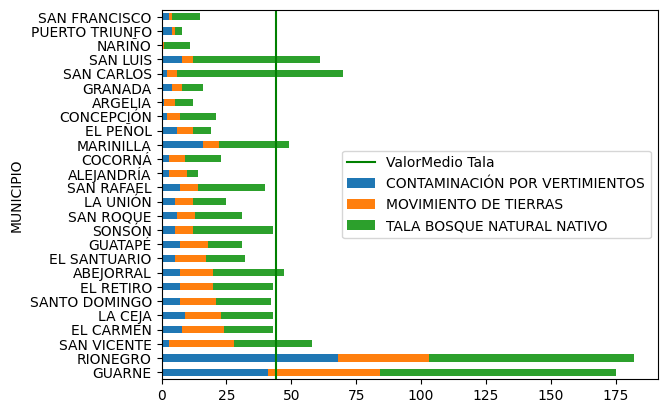

In [51]:
ax = CrossAfectacion.plot( kind= 'barh', stacked=True )
ax.axvline( ValorMedio, color='g', label='ValorMedio Tala' )
ax.legend()

In [55]:
Movimientos = CrossAfectacion['MOVIMIENTO DE TIERRAS']
#Movimientos

In [56]:
ValorMedio1 = 0.
for municipio in Movimientos.keys():
  print(municipio,Probabilidad[municipio],Movimientos[municipio])
  ValorMedio1 += Probabilidad[municipio]*Movimientos[municipio]
ValorMedio1

GUARNE 0.15164644714038128 43
RIONEGRO 0.15771230502599654 35
SAN VICENTE 0.05025996533795494 25
EL CARMEN 0.03726169844020797 16
LA CEJA 0.03726169844020797 14
SANTO DOMINGO 0.036395147313691506 14
EL RETIRO 0.03726169844020797 13
ABEJORRAL 0.04072790294627383 13
EL SANTUARIO 0.02772963604852686 12
GUATAPÉ 0.026863084922010397 11
SONSÓN 0.03726169844020797 7
SAN ROQUE 0.026863084922010397 7
LA UNIÓN 0.021663778162911613 7
SAN RAFAEL 0.03466204506065858 7
ALEJANDRÍA 0.012131715771230503 7
COCORNÁ 0.01993067590987868 6
MARINILLA 0.04246100519930676 6
EL PEÑOL 0.016464471403812825 6
CONCEPCIÓN 0.018197573656845753 5
ARGELIA 0.010398613518197574 4
GRANADA 0.01386481802426343 4
SAN CARLOS 0.060658578856152515 4
SAN LUIS 0.05285961871750433 4
NARIÑO 0.009532062391681109 1
PUERTO TRIUNFO 0.006932409012131715 1
SAN FRANCISCO 0.012998266897746967 1


np.float64(18.639514731369154)

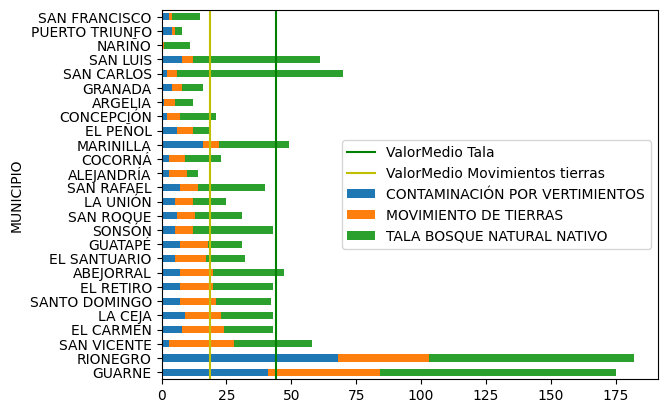

In [58]:
ax = CrossAfectacion.plot( kind= 'barh', stacked=True )
ax.axvline( ValorMedio, color='g', label='ValorMedio Tala' )
ax.axvline( ValorMedio1, color='y', label='ValorMedio Movimientos tierras' )
ax.legend()

In [62]:
Counts_reception = pd.value_counts( data['MEDIO DE  RECEPCION'] )
Counts_reception

/tmp/ipython-input-1981732866.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  Counts_reception = pd.value_counts( data['MEDIO DE  RECEPCION'] )


,count
MEDIO DE RECEPCION,
Telefónico,645
Pagina Web,284
Correo electrónico,217
Escrita,4
Personal,3
De oficio,1


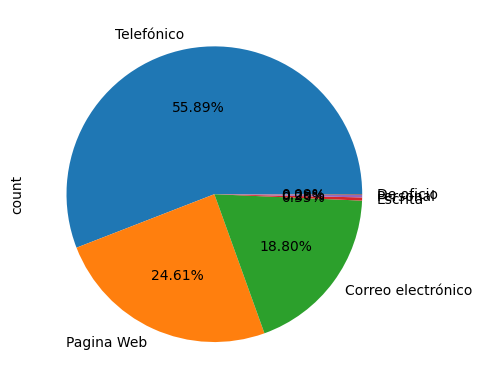

In [65]:
ax = Counts_reception.plot( kind='pie', autopct='%1.2f%%' )